In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [4]:
df = pd.read_csv("height-weight.csv")
df_copy = df.copy()

In [6]:
df_copy.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


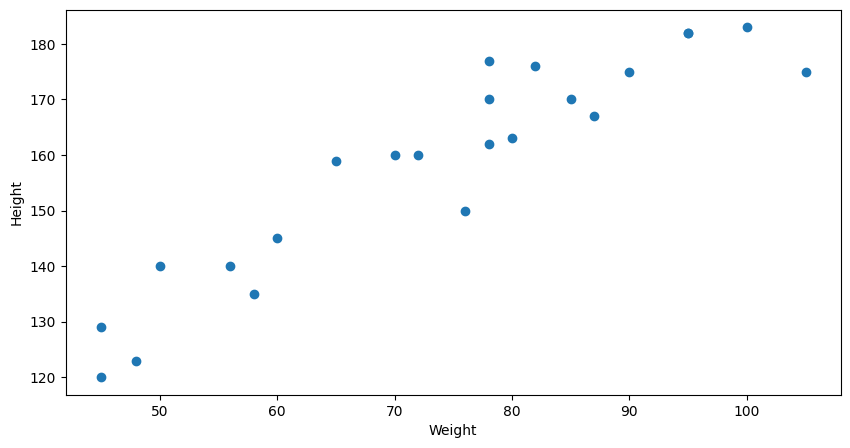

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_copy["Weight"],y=df_copy["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [22]:
X = df_copy[["Weight"]]
y = df_copy["Height"]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

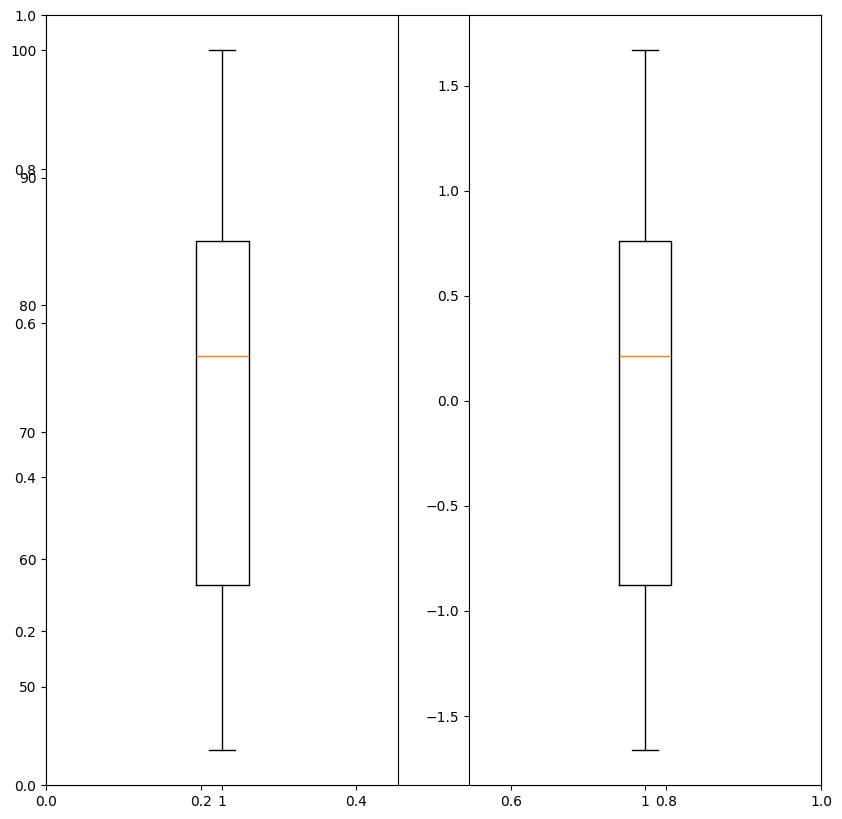

In [48]:
plt.subplots(figsize=(10,10))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.subplot(1,2,2)
plt.boxplot(X_train_scaled)
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)

In [53]:
print(lr_model.coef_)
print(lr_model.intercept_)

[17.2982057]
156.47058823529412


In [54]:
residuals = y_test - y_pred

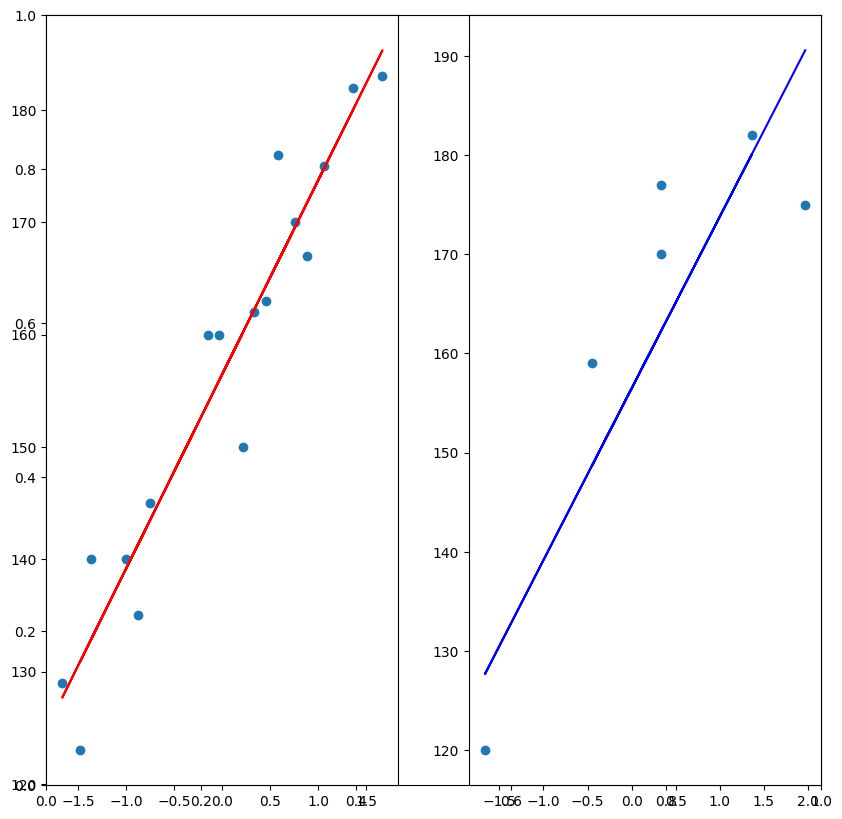

In [78]:
plt.subplots(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled, lr_model.predict(X_train_scaled),"r-")
plt.subplot(1,2,2)
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled, lr_model.predict(X_test_scaled),"b-")
plt.plot()
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
print(mae, mse, rmse, sep="\n")

9.665125886795005
114.84069295228686
10.7163749912126


In [43]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
adjusted_r2 = (1 - ((1 - r2)*(len(y_test)-1))/(len(y_test)-(X_test.shape[1])-1))
print(r2, adjusted_r2, sep="\n")

0.7360826717981279
0.6701033397476599


In [62]:
scaled_new_data = scaler.transform([[80]])
lr_model.predict(scaled_new_data)

c:\Users\Wick\OneDrive\Desktop\AI_learning\Complete Machine Learning,NLP Bootcamp MLOPS & Deployment\Complete-Python-Bootcamp\py_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.36084726])

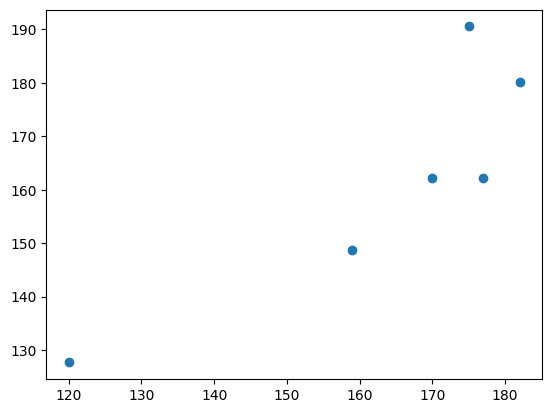

In [64]:
plt.scatter(y_test, y_pred)
plt.show()

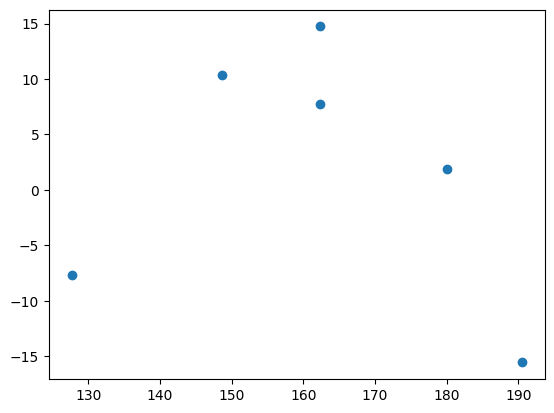

In [65]:
plt.scatter(y_pred, residuals)
plt.show()

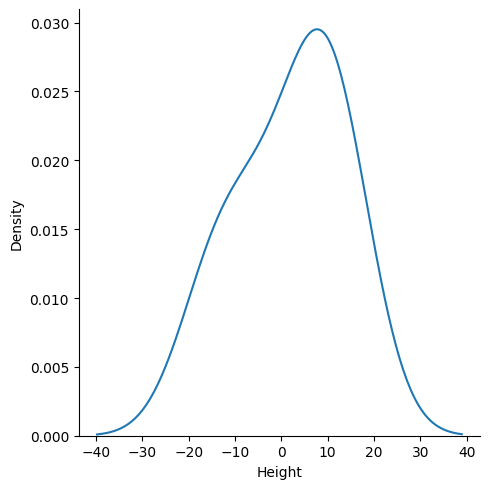

In [79]:
sns.displot(residuals,kind="kde")
plt.show()